# Классификация текстов

In [ ]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [ ]:
data.isna().any()

id          False
keyword      True
location     True
text        False
target      False
dtype: bool

In [ ]:
data = data.fillna('')

In [ ]:
data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
popular_keywords = data.keyword.value_counts()[:11]

In [ ]:
popular_keywords # первый класс NA которые мы доблестно заполнили в первом пункте 

               61
fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
evacuate       40
fear           40
outbreak       40
Name: keyword, dtype: int64

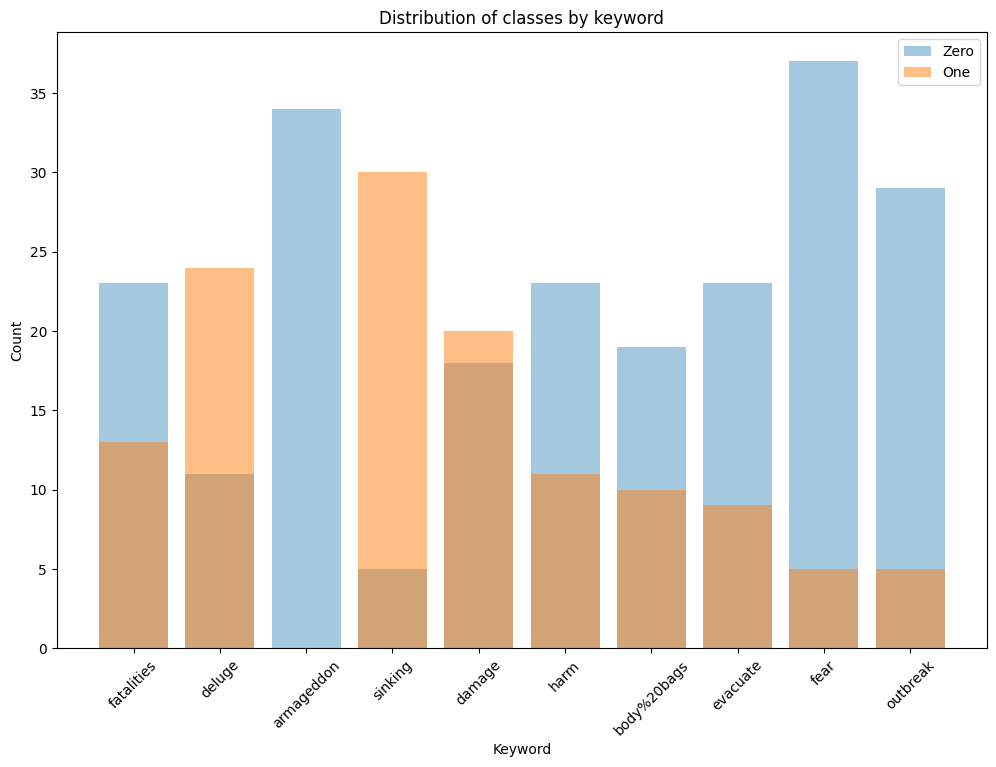

In [ ]:
plt.figure(figsize=(12, 8))
crossik = pd.crosstab(data.target, data.keyword).iloc[:,1:11]
plt.bar(data.keyword.value_counts()[1:11].index, crossik.iloc[0,:].values,alpha=0.4, label="Zero")
plt.bar(data.keyword.value_counts()[1:11].index, crossik.iloc[1,:].values,alpha=0.5, label="One")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.title("Distribution of classes by keyword")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,NaN,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [ ]:
data.drop('id', axis=1, inplace=True)

In [ ]:
data['text'] = data['keyword'] + ' ' + data['location'] + ' ' + data['text']
data.drop(['keyword', 'location'], axis=1, inplace=True)

In [ ]:
data.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.text, data.target, test_size=0.3, random_state=42)

In [ ]:
cv = CountVectorizer()
cv.fit(X_train)
X_train_cv = cv.transform(X_train).toarray()

In [ ]:
X_train_cv.shape

(5329, 18455)

In [ ]:
import re
import string
def contains_digit(vocabulary) -> bool:
    num_count = 0
    for key in vocabulary:
        if bool(re.search(r'\d', key)):
            num_count += 1
    
    return num_count

def contains_punctuation(vocabulary) -> bool:
    punc_count = 0
    p = re.compile('[' + string.punctuation + '\\\\' + ']')
    for key in vocabulary:
        if bool(re.search(p, key)):
            punc_count += 1
    
    return punc_count

def is_hashtag(vocabulary) -> bool:
    hashtag_count = 0  
    for key in vocabulary:           
        if key[0] == '#':
            hashtag_count += 1
    return hashtag_count

def is_mention(vocabulary) -> bool:
    ment_count = 0  
    for key in vocabulary:           
        if key[0] == '@':
            ment_count += 1
    return ment_count

def investigate_vocabulary(vocabulary):
    print('With digit:      ', contains_digit(vocabulary)
          )
    print('With punctuation:', contains_punctuation(vocabulary)
          )
    print('Hashtags:        ', is_hashtag(vocabulary)
          )
    print('Mentions:        ',is_mention(vocabulary)
          )




In [ ]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [ ]:
investigate_vocabulary(cv.vocabulary_)

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


In [ ]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [ ]:
tk = TweetTokenizer()
cvTokenized = CountVectorizer(tokenizer=tk.tokenize)
cvTokenized.fit(X_train)
X_train_cv = cvTokenized.transform(X_train).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
investigate_vocabulary(cvTokenized.vocabulary_)

With digit:       3939
With punctuation: 7338
Hashtags:         1470
Mentions:         1679


In [ ]:
X_train_cv.shape

(5329, 19670)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import snowballstemmer

def contains_only_latin_letters(s: str) -> bool:
    latin_pattern = re.compile('^[a-z]+$')
    return bool(re.match(latin_pattern, s))

def is_emoji(s: str) -> bool:
    smile_pattern = re.compile('(^[^a-zA-Z0-9\n]*[()]+[^a-zA-Z0-9\n]+$)|(^[^a-zA-Z0-9\n]+[()]+[^a-zA-Z0-9\n]*$)')
    return bool(re.match(smile_pattern, s))

def is_hashtag(s: str) -> bool:
    hashtag_pattern = re.compile('^#[a-z]+$')
    return bool(re.match(hashtag_pattern, s))

def custom_tokenizer(s: str) -> List[str]:    
    res = list()
    s = s.lower()
    tk = TweetTokenizer()
    tokenized_text = tk.tokenize(s)
    stop = stopwords.words('english')
    
    for token in tokenized_text:
    
        if contains_only_latin_letters(token) and token not in stop:
            res.append(token)

        elif is_emoji(token) and token not in stop:
            res.append(token)

        elif is_hashtag(token) and token not in stop:
            res.append(token)
    
    stemmer = snowballstemmer.stemmer('english')
    res = stemmer.stemWords(res)
    
    return res

  

In [ ]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

In [ ]:
for i in range(10):
    s = X_train.iloc[i]
    print('\n...............n')
    
    print(f'{custom_tokenizer(s)}')


...............n
['bridg', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']

...............n
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']

...............n
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']

...............n
['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class']

...............n
['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee']

...............n
['airplan', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlb']

...............n
['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast']

...............n
['burn', 'except', 'idk', '

In [ ]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
vectorizer.fit(X_train)
X_train_cust = vectorizer.transform(X_train)
X_test_cust = vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=0.4)
lr.fit(X_train_cust, y_train)
train_prediction = lr.predict(X_train_cust)
test_prediction = lr.predict(X_test_cust)

In [ ]:
from sklearn.metrics import f1_score

print(f'F1 score на train: {f1_score(y_train, train_prediction)}')
print(f'F1 score на test: {f1_score(y_test, test_prediction)}')
# на тренировочных данных значительно лучше скор, мб беды с переобучением -> была добавлена l2 регуляризация

F1 score на train: 0.9046754425783023
F1 score на test: 0.759369907658881


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=custom_tokenizer)
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=0.4)
lr.fit(X_train_tfidf, y_train)
train_prediction = lr.predict(X_train_tfidf)
test_prediction = lr.predict(X_test_tfidf)

In [ ]:
print(f'F1 score на train: {f1_score(y_train, train_prediction)}')
print(f'F1 score на test: {f1_score(y_test, test_prediction)}')

F1 score на train: 0.7909356725146199
F1 score на test: 0.7122969837587008


In [ ]:
print(X_train_tfidf.shape)

(5329, 10478)


In [ ]:
tfidf = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

lr = LogisticRegression(penalty='l2', C=0.4)
lr.fit(X_train_tfidf, y_train)
train_prediction = lr.predict(X_train_tfidf)
test_prediction = lr.predict(X_test_tfidf)

print(f'F1 score на train: {f1_score(y_train, train_prediction)}')
print(f'F1 score на test: {f1_score(y_test, test_prediction)}')

F1 score на train: 0.7909356725146199
F1 score на test: 0.7122969837587008


In [ ]:
print(X_train_tfidf.shape)

(5329, 10478)


In [ ]:
tfidf = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9, min_df=0.001)
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

lr = LogisticRegression(penalty='l2', C=0.4)
lr.fit(X_train_tfidf, y_train)
train_prediction = lr.predict(X_train_tfidf)
test_prediction = lr.predict(X_test_tfidf)

print(f'F1 score на train: {f1_score(y_train, train_prediction)}')
print(f'F1 score на test: {f1_score(y_test, test_prediction)}')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score на train: 0.7754618664140218
F1 score на test: 0.7223476297968396


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

hashing = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000)
hashing.fit(X_train)
X_train_hash = hashing.transform(X_train)
X_test_hash = hashing.transform(X_test)

lr = LogisticRegression(penalty='l2', C=0.4)
lr.fit(X_train_hash, y_train)
train_prediction = lr.predict(X_train_hash)
test_prediction = lr.predict(X_test_hash)

print(f'F1 score на train: {f1_score(y_train, train_prediction)}')
print(f'F1 score на test: {f1_score(y_test, test_prediction)}')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score на train: 0.7633477633477633
F1 score на test: 0.6951995373048004


In [ ]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
vectorizer.fit(X_train)
X_train_cust = vectorizer.transform(X_train)
X_test_cust = vectorizer.transform(X_test) # из 8 пункта

In [ ]:
lr = LogisticRegression(penalty='l2', C=0.49)
lr.fit(X_train_cust, y_train)
train_prediction = lr.predict(X_train_cust)
test_prediction = lr.predict(X_test_cust)

print(f'F1 score на train: {f1_score(y_train, train_prediction)}')
print(f'F1 score на test: {f1_score(y_test, test_prediction)}')

F1 score на train: 0.9196850393700787
F1 score на test: 0.7604110329908058
